<a href="https://colab.research.google.com/github/ajbsarmi/AAC_CreditCard_Clustering_Regression/blob/main/Notebooks/1_Data_Import_Initial_Exploration_and_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Overview of the notebook:


*   Data Import & Initial Exploration
*   Data Cleaning
*   Data Transformation
*   Exploratory Data Analysis

----

### Credits
- **Eskwelabs Team**
- **Instructor:** Jace Peralta
- **Group Mates:** Bea Reyes, Austine Wong, Evian Aguilar, Japhet Pamonag

**By:** Arden Sarmiento


# Data Import & Initial Exploration

In [40]:
# Import libarries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
# Mount GDrive's folders
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# This code imports a library "os" that allows file navigation
import os

# This code sets the home directory
# Find your folder and put the path here as a string
os.chdir('/content/drive/MyDrive/Development/DSF/DSFC13 Sprint 1')

In [43]:
# Create data frame
df = pd.read_csv("Data/cc_dirty.csv")

# Check first 5 rows
df.head()

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt
0,6.760000e+11,M,Dasmarinas,"659,019 people",Chartered loss adjuster,12/12/1958,7.980000e+11,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,$68.88
1,3.520000e+15,M,Digos,"169,393 people","Administrator, charities/voluntary organisations",31/08/1970,9.680000e+11,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,$50.06
2,4.140000e+18,Male,Calapan,"133,893 people",Financial controller,23/07/1953,6.280000e+11,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,$105.44
3,4.870000e+15,M,San Fernando,"121,812 people",NaN,18/07/1964,NaN,863000000000,45bbe714e51ab8a375454d39a190b0cb,1613063704,food_dining,$38.61
4,4.720000e+15,M,Laoag,"111,125 people",Dance movement psychotherapist,11/01/1954,2.570000e+11,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,$82.69


In [44]:
# check data type info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111877 entries, 0 to 111876
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   cc_num     111877 non-null  float64
 1   gender     111877 non-null  object 
 2   city       111877 non-null  object 
 3   city_pop   111877 non-null  object 
 4   job        103427 non-null  object 
 5   dob        111877 non-null  object 
 6   acct_num   103427 non-null  float64
 7   acct_num2  111877 non-null  int64  
 8   trans_num  111877 non-null  object 
 9   unix_time  111877 non-null  int64  
 10  category   103318 non-null  object 
 11  amt        111877 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 10.2+ MB


In [45]:
# check summary statistics
df.describe()

,cc_num,acct_num,acct_num2,unix_time
count,1.118770e+05,1.034270e+05,1.118770e+05,1.118770e+05
mean,3.766363e+17,6.047232e+11,5.727952e+11,1.609150e+09
std,1.231570e+18,2.683925e+11,2.892380e+11,1.719147e+07
min,6.049060e+10,1.240000e+11,3.843261e+09,1.577837e+09
25%,3.800000e+13,3.843000e+11,2.980000e+11,1.594457e+09
50%,3.520000e+15,5.870000e+11,5.810000e+11,1.608344e+09
75%,4.620000e+15,8.510000e+11,8.450000e+11,1.624344e+09
max,4.830000e+18,9.964000e+11,9.940000e+11,1.638835e+09


Text(0, 0.5, 'Count')

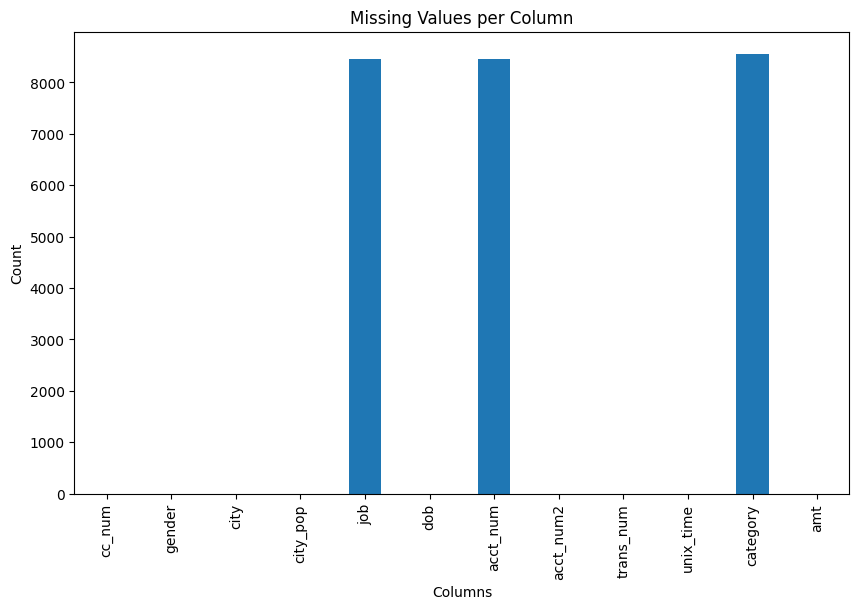

In [46]:
# check for missing values
missing_values = df.isnull().sum()
missing_values.plot(kind='bar', figsize=(10,6))
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Count')

We have aboe 8,000 missing values for the following columns
1. dob
2. account_num
3. category




## Check values of each column and their count

In [47]:
# Check credit card numbers
df['cc_num'].value_counts()

,count
cc_num,
1.800000e+14,7134
3.520000e+15,6283
3.030000e+13,3948
6.550000e+15,3184
6.390000e+11,3162
...,...
4.540000e+15,10
3.550000e+15,9
2.300000e+15,8


In [48]:
# Check gender
df['gender'].value_counts()

,count
gender,
M,73836
Male,31692
F,3812
Female,2537


We should combine M & Male and aslo F & Female

In [49]:
# Check city
df['city'].value_counts().sort_index()

,count
city,
Angeles City,2363
Antipolo,825
Bacolod,13
Balanga,1573
Batangas,2365
Binan,2378
Butuan,2386
Cabanatuan City,1557
Cadiz,5545


Remove the word city for consistency

In [50]:
# Check city population
df['city_pop'].value_counts()

,count
city_pop,
"133,893 people",5562
"283,157 people",5545
"121,812 people",5545
"95,389 people",5521
"659,019 people",4742
"174,625 people",3993
"233,040 people",3951
"199,060 people",3936
"131,377 people",3135


remove the world people so we can change the city_pop dtype to integer

In [51]:
# Check Jobs
df['job'].value_counts()

,count
job,
Tourist information centre manager,4441
Psychotherapist,4394
"Designer, fashion/clothing",2227
"Surveyor, planning and development",2217
Financial controller,2206
...,...
Biomedical scientist,8
"Librarian, public",7
Claims inspector/assessor,7


In [52]:
# Check Unique Jobs
df['job'].unique()

array(['Chartered loss adjuster',
       'Administrator, charities/voluntary organisations',
       'Financial controller', nan, 'Dance movement psychotherapist',
       'Engineer, water', 'Education officer, museum',
       'Manufacturing systems engineer', 'Brewing technologist',
       'Tourist information centre manager', 'Seismic interpreter',
       'Customer service manager', 'Radiographer, diagnostic',
       'Diplomatic Services operational officer', 'Broadcast journalist',
       'Social worker', 'English as a foreign language teacher',
       'Emergency planning/management officer',
       'Designer, fashion/clothing', 'Contracting civil engineer',
       'Engineer, mining', 'Teacher, early years/pre',
       'Geologist, engineering', 'Psychotherapist',
       'Scientific laboratory technician', 'Aid worker',
       'Camera operator', 'Secretary, company',
       'Public relations account executive', 'Medical physicist',
       'Copywriter, advertising', 'Research officer, p

In [53]:
# Check date of birth
df['dob'].value_counts()

,count
dob,
11/01/1966,2407
03/02/1943,2391
03/02/1970,2388
23/07/1953,2385
08/02/1960,2378
...,...
16/08/1953,8
25/10/1926,7
20/06/1928,7


In [54]:
# Check account numbers
df['acct_num'].value_counts()

,count
acct_num,
4.390000e+11,2254
8.510000e+11,2227
9.020000e+11,2227
9.021000e+11,2217
6.280000e+11,2206
...,...
6.440000e+11,7
4.600000e+11,7
2.290000e+11,6


In [55]:
# Check account numbers 2
df['acct_num2'].value_counts()

,count
acct_num2,
902000000000,4769
845000000000,3940
233000000000,3153
581000000000,2420
439000000000,2407
...,...
808000000000,8
229000000000,7
644000000000,7


In [56]:
# Check transactions numbers
df['trans_num'].value_counts()

,count
trans_num,
b2b550837de2dfd5390801f859a2a6a6,2
c1073b732570ad902c839de2fad9fdfa,2
53d9dd111f00eb819292920b43576633,2
34f342421f08f24a3416e7190964c5f4,2
83006f5f360a2dd081b0c75dddf07238,2
...,...
4c75260f14e372246c358bd9293b9c40,1
5d1c2d09933a1d6bf6c412901d5b781e,1
d45077e66445b91eaef9edd3d507905c,1


In [57]:
# Check unix time
df['unix_time'].value_counts()

,count
unix_time,
1617328863,3
1606538226,3
1606177234,3
1605263767,3
1591503082,3
...,...
1590723812,1
1597873231,1
1592562886,1


In [58]:
# Check categories
df['category'].value_counts()

,count
category,
shopping_pos,10528
gas_transport,10505
grocery_pos,10450
kids_pets,10204
home,10094
personal_care,8365
food_dining,8149
entertainment,7981
misc_pos,6802


In [59]:
# Check categories
df['category'].unique()

array(['shopping_net', 'entertainment', 'food_dining', 'gas_transport',
       'home', 'kids_pets', nan, 'personal_care', 'shopping_pos',
       'grocery_pos', 'travel', 'misc_net', 'health_fitness', 'misc_pos',
       'grocery_net'], dtype=object)

In [60]:
# Check amount
df['amt'].value_counts()

,count
amt,
$1.22,68
$1.45,66
$1.90,60
$1.17,60
$1.57,59
...,...
$356.25,1
$137.48,1
$105.38,1


Remove '$' sign so we can change dtype amt to float

# Data Cleaning

In [61]:
# Fix d types of columns and transform other column

# Change cc_nun to object
df['cc_num'] = df['cc_num'].astype(str)

# Change M & F to Male and Female
df['gender'] = df['gender'].replace({'M':'Male', 'F':'Female'})

# Remove people in city_pop
df['city_pop'] = df['city_pop'].str.replace(' people','').str.replace(',', '').astype(int)
df['city_pop'] = df['city_pop'].astype(int)

# Change dob to date type
df['dob'] = pd.to_datetime(df['dob'], format='%d/%m/%Y')

# Convert unix_time to date time
df['unix_time'] = pd.to_datetime(df['unix_time'], unit='s')

# Convert amount to float
df['amt'] = df['amt'].str.replace('$', '').astype(float)

# Remove "City" in city column
df['city'] = df['city'].str.replace(' City','').str.replace('City of ','')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111877 entries, 0 to 111876
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   cc_num     111877 non-null  object        
 1   gender     111877 non-null  object        
 2   city       111877 non-null  object        
 3   city_pop   111877 non-null  int64         
 4   job        103427 non-null  object        
 5   dob        111877 non-null  datetime64[ns]
 6   acct_num   103427 non-null  float64       
 7   acct_num2  111877 non-null  int64         
 8   trans_num  111877 non-null  object        
 9   unix_time  111877 non-null  datetime64[ns]
 10  category   103318 non-null  object        
 11  amt        111877 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 10.2+ MB


## Check Distribution

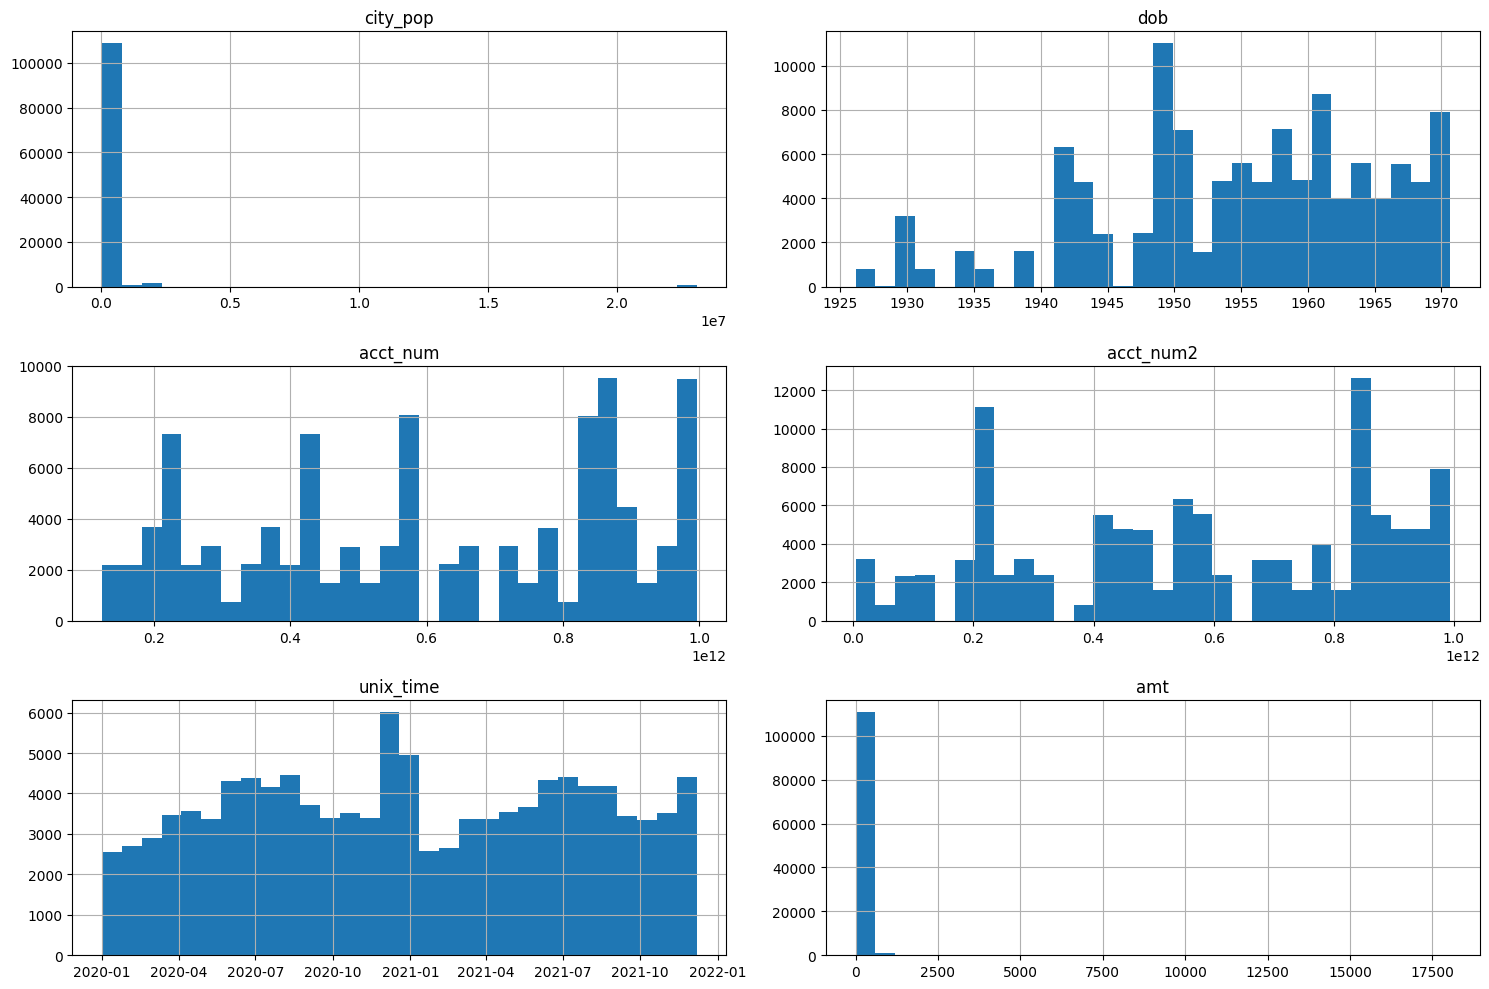

In [62]:
# Quick distribution plots for all numeric columns
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

# Data Transformation

In [63]:
# Load the cleaned data csv
df_clean= pd.read_csv("Data/cc_clean.csv")
df_clean.head()

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,12/12/1958,7.980000e+11,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,68.88,2020-02-10 13:53:31
1,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",31/08/1970,9.680000e+11,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,50.06,2020-05-31 13:29:28
2,4.140000e+18,M,Calapan,133893,Financial controller,23/07/1953,6.280000e+11,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,105.44,2020-03-29 13:52:37
3,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,11/01/1954,2.570000e+11,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,82.69,2020-09-28 16:35:59
4,3.530000e+15,M,City of Paranaque,665822,"Engineer, water",31/07/1961,5.400000e+11,540000000000,b389cc449c9c298e8c004024449f7a27,1594960430,shopping_net,363.49,2020-07-17 12:33:50


In [64]:
# Check dtypes of the data
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92432 entries, 0 to 92431
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cc_num          92432 non-null  float64
 1   gender          92432 non-null  object 
 2   city            92432 non-null  object 
 3   city_pop        92432 non-null  int64  
 4   job             92432 non-null  object 
 5   dob             92432 non-null  object 
 6   acct_num        92432 non-null  float64
 7   acct_num2       92432 non-null  int64  
 8   trans_num       92432 non-null  object 
 9   unix_time       92432 non-null  int64  
 10  category        85391 non-null  object 
 11  amt             92432 non-null  float64
 12  trans_datetime  92432 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 9.2+ MB


In [65]:
# Convert to pandas datetimes
df_clean['trans_datetime'] = pd.to_datetime(df_clean['trans_datetime'])


In [66]:
# Find the minimum and maximum dates
min_date = df_clean['trans_datetime'].min()
max_date = df_clean['trans_datetime'].max()

print(f"The date range of the transactions is from {min_date} to {max_date}.")

The date range of the transactions is from 2020-01-01 08:06:15 to 2021-12-07 07:50:42.


In [67]:
# Define the current date
current_date = pd.to_datetime('2022-01-01')

# Change age dtype to date time
df_clean['dob'] = pd.to_datetime(df_clean['dob'], format='%d/%m/%Y')

#Add the age column
df_clean['age'] = (current_date - df_clean['dob']).dt.days // 365.25
df_clean['age'] = df_clean['age'].astype('int')
df_clean.head()

# Create age segment
def age_segment(age):
    if age >= 95:
        return 'Greatest Generation'
    elif 77 <= age <= 94:
        return 'Silent Generation'
    elif 58 <= age <= 76:
        return 'Baby Boomer'
    elif 42 <= age <= 57:
        return 'Gen X'
    else:
        return 'Younger Cohort'

df_clean['age_segment'] = df_clean['age'].apply(age_segment)
df_clean.head()

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime,age,age_segment
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,7.980000e+11,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,68.88,2020-02-10 13:53:31,63,Baby Boomer
1,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",1970-08-31,9.680000e+11,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,50.06,2020-05-31 13:29:28,51,Gen X
2,4.140000e+18,M,Calapan,133893,Financial controller,1953-07-23,6.280000e+11,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,105.44,2020-03-29 13:52:37,68,Baby Boomer
3,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,1954-01-11,2.570000e+11,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,82.69,2020-09-28 16:35:59,67,Baby Boomer
4,3.530000e+15,M,City of Paranaque,665822,"Engineer, water",1961-07-31,5.400000e+11,540000000000,b389cc449c9c298e8c004024449f7a27,1594960430,shopping_net,363.49,2020-07-17 12:33:50,60,Baby Boomer


In [68]:
# Create month column
df_clean["month"] = df_clean.trans_datetime.dt.month #01
df_clean["month_abbr"] = df_clean.trans_datetime.dt.strftime('%b')

# Create a quarter column
df_clean['quarter'] = 'Q' + ((df_clean['month']/4).astype(int) + 1).astype(str)

# Create a year column
df_clean['year'] = df_clean['trans_datetime'].dt.year

df_clean.head()

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime,age,age_segment,month,month_abbr,quarter,year
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,7.980000e+11,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,68.88,2020-02-10 13:53:31,63,Baby Boomer,2,Feb,Q1,2020
1,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",1970-08-31,9.680000e+11,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,50.06,2020-05-31 13:29:28,51,Gen X,5,May,Q2,2020
2,4.140000e+18,M,Calapan,133893,Financial controller,1953-07-23,6.280000e+11,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,105.44,2020-03-29 13:52:37,68,Baby Boomer,3,Mar,Q1,2020
3,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,1954-01-11,2.570000e+11,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,82.69,2020-09-28 16:35:59,67,Baby Boomer,9,Sep,Q3,2020
4,3.530000e+15,M,City of Paranaque,665822,"Engineer, water",1961-07-31,5.400000e+11,540000000000,b389cc449c9c298e8c004024449f7a27,1594960430,shopping_net,363.49,2020-07-17 12:33:50,60,Baby Boomer,7,Jul,Q2,2020


# Exploratory Data Analysis

## Customer Demographics

In [69]:
# Filter the DataFrame for unique account numbers
unique_customers_df = df_clean.drop_duplicates(subset='acct_num', keep='first')

# Display the filtered DataFrame
print(unique_customers_df.shape)
unique_customers_df.head()


(94, 19)


,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime,age,age_segment,month,month_abbr,quarter,year
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,7.980000e+11,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,68.88,2020-02-10 13:53:31,63,Baby Boomer,2,Feb,Q1,2020
1,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",1970-08-31,9.680000e+11,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,50.06,2020-05-31 13:29:28,51,Gen X,5,May,Q2,2020
2,4.140000e+18,M,Calapan,133893,Financial controller,1953-07-23,6.280000e+11,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,105.44,2020-03-29 13:52:37,68,Baby Boomer,3,Mar,Q1,2020
3,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,1954-01-11,2.570000e+11,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,82.69,2020-09-28 16:35:59,67,Baby Boomer,9,Sep,Q3,2020
4,3.530000e+15,M,City of Paranaque,665822,"Engineer, water",1961-07-31,5.400000e+11,540000000000,b389cc449c9c298e8c004024449f7a27,1594960430,shopping_net,363.49,2020-07-17 12:33:50,60,Baby Boomer,7,Jul,Q2,2020


In [70]:
# How many % of our customers
pct_gender = (unique_customers_df['gender'].value_counts() / unique_customers_df['gender'].count() * 100).round(0)
pct_gender = pct_gender.astype(str) + '%'
print(pct_gender)

gender
M    94.0%
F     6.0%
Name: count, dtype: object


In [71]:
# What is the Age Range?
min_age = df_clean['age'].min()
max_age = df_clean['age'].max()

print(f"The age range of our customers is from {min_age} to {max_age}.")

The age range of our customers is from 51 to 95.


In [72]:
# What is the Mean Age?
mean = round(unique_customers_df['age'].mean(),0)
print(mean)


67.0


<Axes: ylabel='year'>

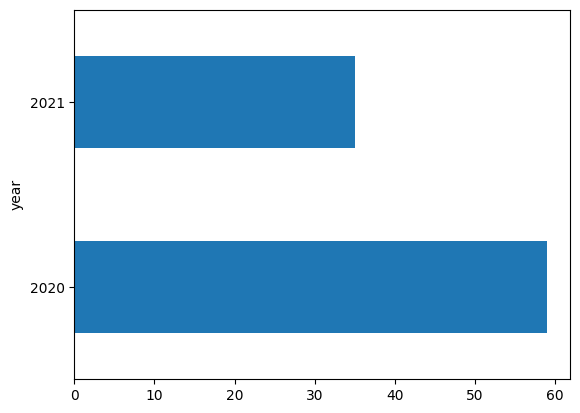

In [73]:
# How Active Customers do we have per year?
active_customers = unique_customers_df.groupby('year')['acct_num'].count().plot(kind='barh')
active_customers

<Axes: ylabel='age_segment'>

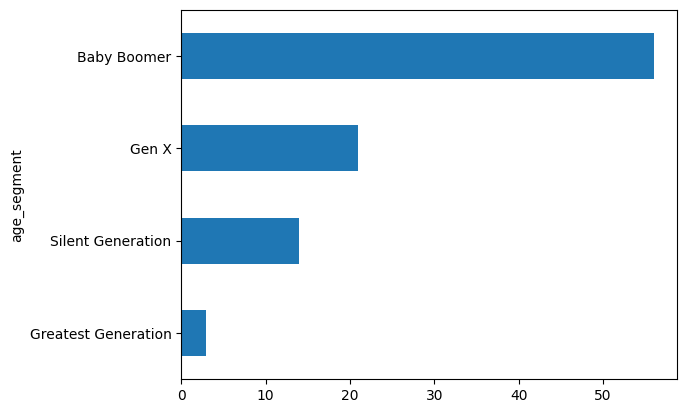

In [74]:
# Age Segment Distribution
age_segment_distrib = unique_customers_df['age_segment'].value_counts().sort_values(ascending=True).plot(kind='barh')
age_segment_distrib

## Transactions and Spending

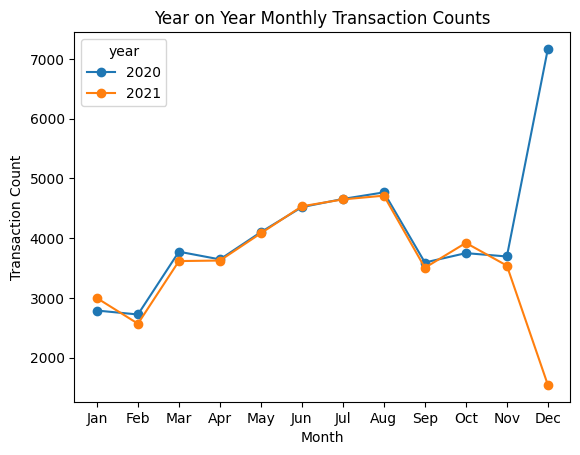

In [75]:
# Year on Year Monthly Transaction Counts
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Group by month and year, then count transactions
transaction_counts = (df_clean.groupby(['month_abbr', 'year'])['trans_num']
                      .count()
                      .unstack(fill_value=0))

# Reindex the DataFrame to ensure all months are in correct order
transaction_counts = transaction_counts.reindex(month_order)

# Plot the data
ax = transaction_counts.plot(kind='line', marker='o')

# Set the x-axis tick labels to months
ax.set_xticks(range(len(month_order)))
ax.set_xticklabels(month_order)

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Transaction Count')
ax.set_title('Year on Year Monthly Transaction Counts')

plt.show()

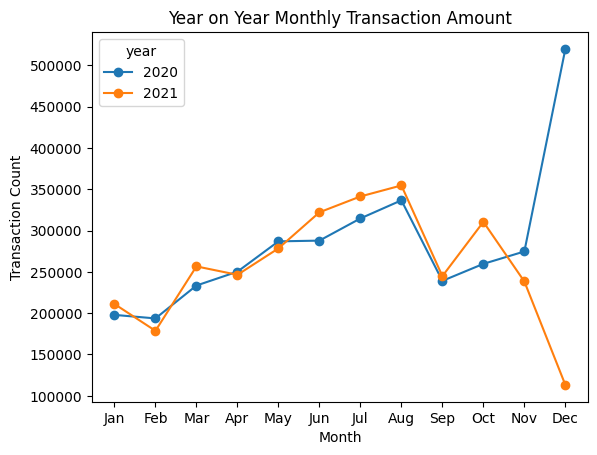

In [76]:
# Year on Year Monthly Transaction Amount
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Group by month and year, then count transactions
transaction_counts = (df_clean.groupby(['month_abbr', 'year'])['amt']
                      .sum()
                      .unstack(fill_value=0))

# Reindex the DataFrame to ensure all months are in correct order
transaction_counts = transaction_counts.reindex(month_order)

# Plot the data
ax = transaction_counts.plot(kind='line', marker='o')

# Set the x-axis tick labels to months
ax.set_xticks(range(len(month_order)))
ax.set_xticklabels(month_order)

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Transaction Count')
ax.set_title('Year on Year Monthly Transaction Amount')

plt.show()

## Category Spending

<Axes: ylabel='category'>

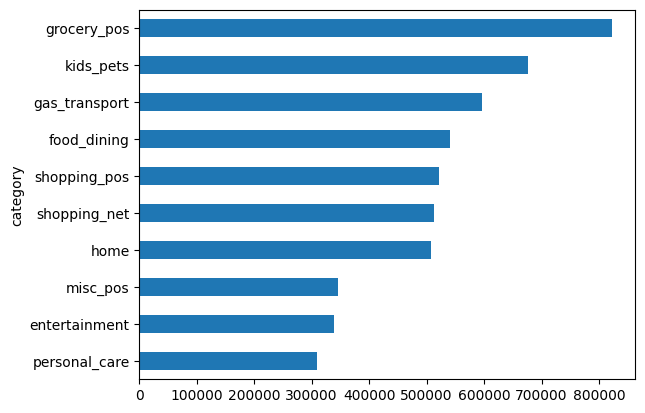

In [77]:
# Amount per category

amt_category = df_clean.groupby('category')['amt'].sum().nlargest(10).sort_values(ascending=True)
amt_category.plot(kind='barh')